In [1]:
get_ipython().magic('matplotlib notebook')
get_ipython().magic('load_ext autoreload')
get_ipython().magic('autoreload 2')
import sys
import numpy as np
import time
import matplotlib.pyplot as plt
import copy as cp

#+____IMPORT FESOM RELATET ROUTINES____________________________________________+
from set_inputarray  import *
from sub_fesom_mesh  import * 
from sub_fesom_mesh  import * 
from sub_fesom_data  import * 
from sub_fesom_plot  import *
from colormap_c2c    import *


In [2]:
#+_____________________________________________________________________________+
#|                                                                             |
#|                         *** LOAD FVSOM MESH ***                             |
#|                                                                             |
#+_____________________________________________________________________________+
# for more options look in set_inputarray.py
inputarray=set_inputarray()
inputarray['save_fig'        ] = False
inputarray['save_figpath'    ] = '/home/ollie/pscholz/figures/poster_TRR181_winterschool/'


# set plot box for cyl projection (default: [-180,180,-90,90])
#inputarray['which_box'] = [0,360,-90,90] ; inputarray['mesh_focus']=180
inputarray['which_box'] = [-180,180,-90,90]
#inputarray['which_box'] = [-100,45,0,90]
#inputarray['which_box'] = [-80,-60,30,45]
#inputarray['which_box'] = [-90,35,20,85]
#inputarray['which_box'] = [-180,180,35,90]
#inputarray['which_box'] = [-180,180,-90,-50]
#inputarray['which_box'] = [-180,180,35,90]
# inputarray['which_box'] = [100,150,-20,20]

# set projection variable --> the lon/lat projection plot ranges are set via 
# inputarray['which_box'] = [lonmin,lonmax,latmin,latmax]
inputarray['proj'     ] = 'cyl' # 'ortho', 'cyl', 'npstere' , 'spstere'
inputarray['proj_lon' ] = -45 #only for ortho
inputarray['proj_lat' ] = 45 #only for ortho

inputarray['mesh_id'		 ] = 'COREv2'
#inputarray['mesh_dir'		 ] = '/work/ollie/pscholz/mesh_fesom2.0/mesh_CORE2_final/'
#inputarray['mesh_dir'		 ] = '/work/ollie/dsidoren/input/fesom2.0/meshes/mesh_CORE2_final/'
inputarray['mesh_dir'		 ] = '/work/ollie/pscholz/mesh_fesom2.0/mesh_CORE2_dsidorenko_meanval/'
try:
	mesh
except NameError:
	mesh = fesom_init_mesh(inputarray)
else:
	print(" --> ___FOUND FESOM MESH --> will use it!___________________________")


___LOAD FESOM MESH_________________________________________
 --> read grid files
     > nod2d.out
     > elem2d.out
     > aux3d.out
     > nlvls.out
     > elvls.out
 --> rotate mesh rot2geo
 --> remove cyclic boundary
 --> calc landmask contourline
 --> rotate mesh geo2rot



___PLOT 2D DATA____________________________________________


<IPython.core.display.Javascript object>


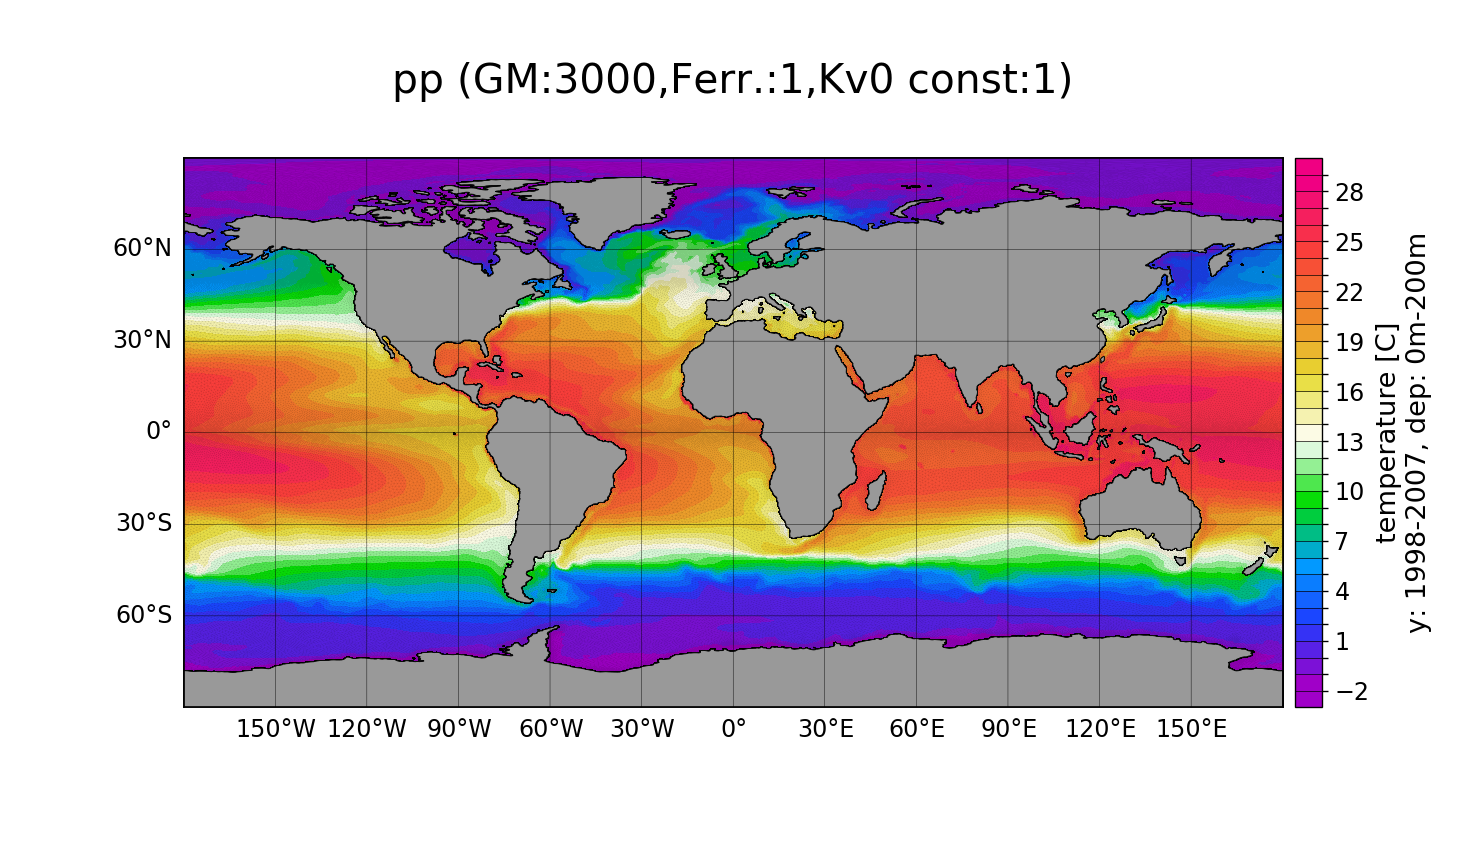

[cmin,cmax,cref] = [-1.8863248865814513, 28.124723118204184, 13.0]
clevel =  [ -2.  -1.   0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.
  13.  14.  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.
  28.  29.]

___PLOT 2D DATA____________________________________________


<IPython.core.display.Javascript object>


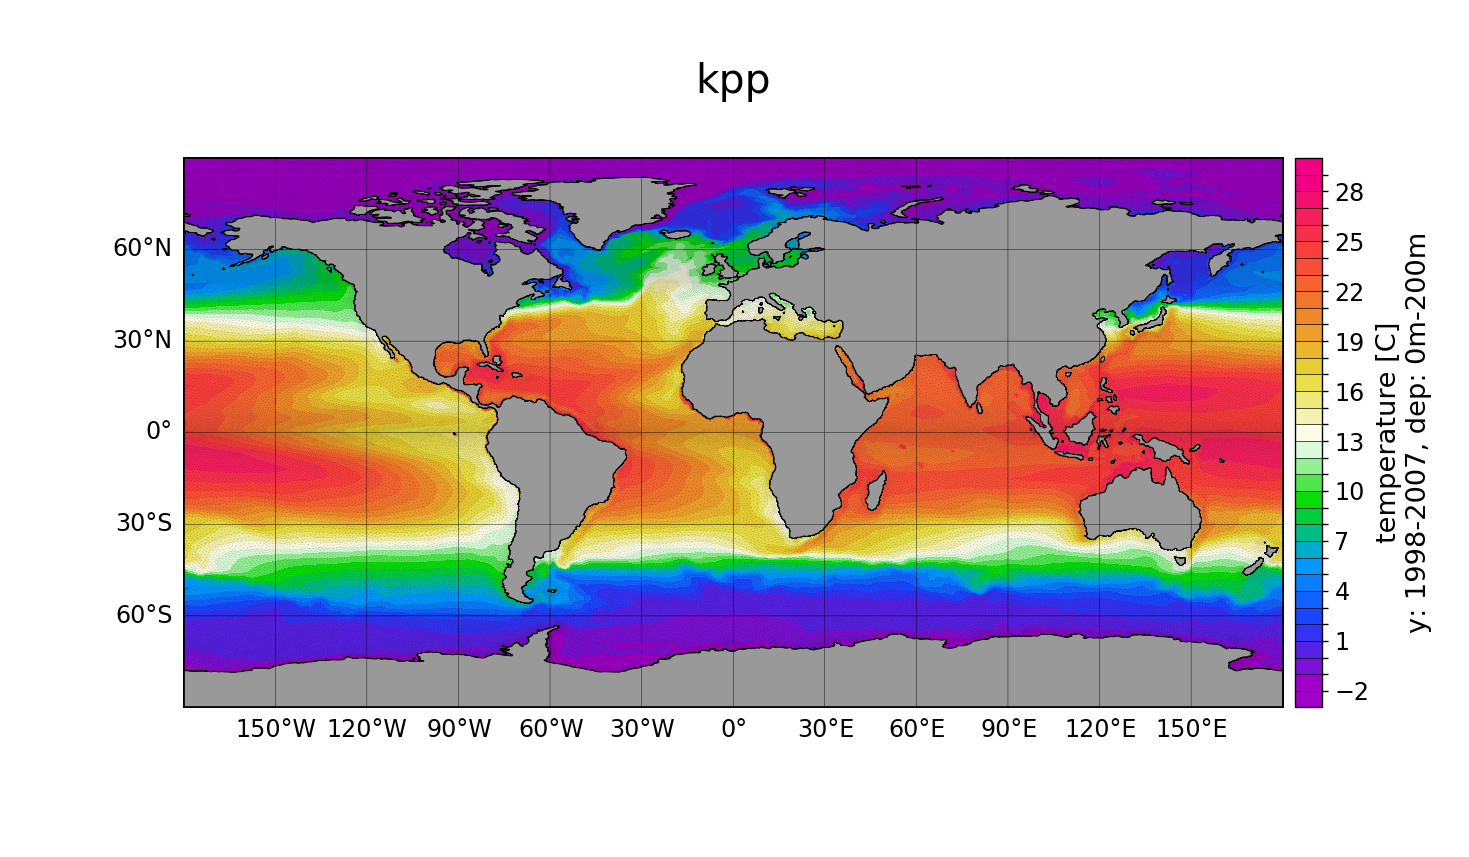

[cmin,cmax,cref] = [-1.8863248865814513, 28.124723118204184, 13.0]
clevel =  [ -2.  -1.   0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.
  13.  14.  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.
  28.  29.]

___PLOT 2D DATA____________________________________________


<IPython.core.display.Javascript object>


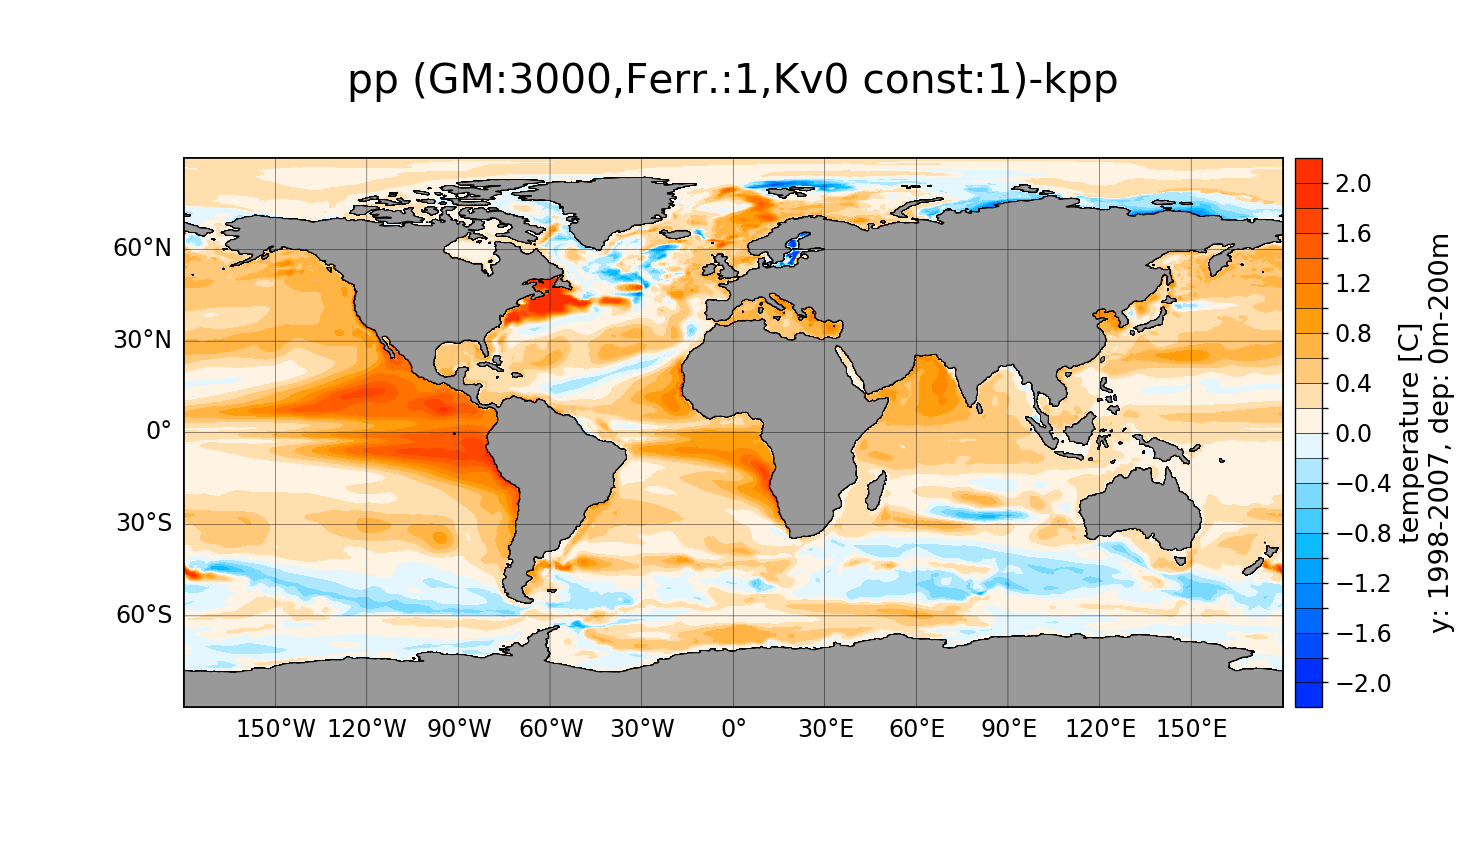

[cmin,cmax,cref] = [-2.0, 2.0, 0.0]
clevel =  [-2.  -1.8 -1.6 -1.4 -1.2 -1.  -0.8 -0.6 -0.4 -0.2  0.   0.2  0.4  0.6  0.8
  1.   1.2  1.4  1.6  1.8  2. ]


In [11]:
#+_____________________________________________________________________________+
#|                                                                             |
#|                         *** SET INPUT PARAMETER ***                         |
#|                                                                             |
#+_____________________________________________________________________________+
# setup variable name, runid and data path
data 			= fesom_data(inputarray) # init fesom2.0 data object
# data.descript,data.path = 'zstar' , '../results/zstar/withoutPC-1/'
# data.descript,data.path = 'zstar_pgf' , '../results/zstar_pgf/withoutpc/1/'
#data.descript,data.path = 'linfs' , '/work/ollie/dsidoren/results/CORE2/ref/gm_redi_11/1/'
#data.descript,data.path = 'pp (GM:3000,Ferr.:0)' ,'/work/ollie/pscholz/results_fesom2.0/linfs/mixpp_GM3000_scalF0/1/'
#data.descript,data.path = 'pp (GM:3000,Ferr.:1,Mo:0)' ,'/work/ollie/pscholz/results_fesom2.0/linfs/mixpp_GM3000_scalF1/1/'
#data.descript,data.path = 'pp (GM:3000,Ferr.:1,Mo:1)' ,'/work/ollie/pscholz/results_fesom2.0/linfs/mixpp_GM3000_scalF1_MO1/1/'
#data.descript,data.path = 'pp (GM:1500,Ferr.:0)' ,'/work/ollie/pscholz/results_fesom2.0/linfs/mixpp_GM1500_scalF0/1/'
#data.descript,data.path = 'kpp (GM:3000,Ferr.:1,Kv0:const)' ,'/work/ollie/pscholz/results_fesom2.0/linfs/mixkpp_GM3000_scalF1_Kv0const1/1/'
data.descript,data.path = 'pp (GM:3000,Ferr.:1,Kv0 const:1)' ,'/work/ollie/pscholz/results_fesom2.0/linfs/mixpp_GM3000_scalF1_MO1/1/'
#data.descript,data.path = 'pp (GM:3000,Ferr.:1,Kv0 const:0)' ,'/work/ollie/pscholz/results_fesom2.0/linfs/mixpp_GM3000_scalF1_MO1_Kv0const0/1/'
data.var 		= 'temp'

#+_____________________________________________________________________________+
# select year to average over [start_yr, end_yr]
# data.year		= [1998,2007]
#data.year		= [1990,2000]
data.year		= [1998,2007]

# select month to average over
data.month		= [1,2,3,4,5,6,7,8,9,10,11,12]
#data.month		= [1,2,12]
#data.month		= [6,7,8]
#data.month		= [1,2,12]
#data.month		= [3]

# select linear interpolated depth layers to average over
# data.depth		= [0,10,20,30,40,50,75,100]
#data.depth		= np.arange(   0, 100+1,10)
data.depth		= np.arange(   0, 200+1,10)
#data.depth		= np.arange( 200, 500+1,20)
#data.depth	    = np.arange( 500,1000+1,50)
#data.depth	    = np.arange(1000,1500+1,50)

#+_____________________________________________________________________________+
# make anomaly
do_anomaly      = True
#do_anomaly      = False
if do_anomaly==True:
    data2 			= cp.copy(data) # init fesom2.0 data object
    # data2.descript,data2.path = 'pgflinfs','../results/test_pgflinfs'
    # data2.descript,data2.path = 'linfs','../results/linfs/withoutPC-2/'
    # data2.descript,data2.path = 'zstar','../results/zstar/withoutPC-1/'
    # data2.descript,data2.path = 'oldpc','../results/linfs/withPC-1/'
    # data2.descript,data2.path = 'zlevel','../results/zlevel/withoutPC-1/'
    # data2.descript,data2.path = 'zstar','../results/zstar/withoutPC-1/'
    # data2.descript,data2.path = 'GMx4','/work/ollie/dsidoren/results/CORE2/ref/gm_sox4_redi/'
    #data2.descript,data2.path = 'GMx1' , '/work/ollie/dsidoren/results/CORE2/ref/gm_redi_11/1/'
    #data2.descript,data2.path = 'zstar_max','../results/zstar_pgf/withoutpc/1/'
    #data2.descript,data2.path = 'zstar_min','../results/zstar_pgf/zminval/1/'
    #data2.descript,data2.path = 'zstar_mean','../results/zstar_pgf/zmeanval/1/'
    data2.descript,data2.path = 'kpp','/work/ollie/pscholz/results_fesom2.0/linfs/zmeanval/1/'
    #data2.descript,data2.path = 'pp (GM:3000,Ferr.:1,Mo:0)' ,'/work/ollie/pscholz/results_fesom2.0/linfs/mixpp_GM3000_scalF1/1/'
    #data2.descript,data2.path = 'pp (GM:3000,Ferr.:1,Kv0 const:1)' ,'/work/ollie/pscholz/results_fesom2.0/linfs/mixpp_GM3000_scalF1_MO1/1/'
    
#+_____________________________________________________________________________+
#|                                                                             |
#|                         *** LOAD FVSOM DATA ***                             |
#|                                                                             |
#+_____________________________________________________________________________+
# plot topography
if data.var=='depth':
    data.value 	= -mesh.nodes_2d_z
    #data.value 	= mesh.nodes_2d_iz
    data.sname, data.lname, data.unit, data.cmap = 'depth', 'Depth', 'm', 'wbgyr'
    data.levels = np.arange(0,np.max(data.value),200)# set resolution levels
#_______________________________________________________________________________
# plot triangle resolution interpolated to node
elif data.var=='triresol':
    if len(mesh.nodes_2d_resol)==0: mesh.fesom_calc_triresol()
    data.value 	= mesh.nodes_2d_resol
    data.sname, data.lname, data.unit, data.cmap = 'triresol', 'Resolution', 'km', 'odv'
    data.levels = np.arange(0,np.max(data.value),10)# set resolution levels
#_______________________________________________________________________________
# plot triangle area interpolated to node
elif data.var=='triarea':
    if len(mesh.nodes_2d_area)==0: mesh.fesom_calc_triarea()
    data.value 	= mesh.nodes_2d_area
    data.sname,data.lname, data.unit, data.cmap= 'triarea', 'Area', 'km^2', 'cmocean.cm.balance'
    data.levels = np.arange(0,np.max(data.value),10)# set resolution levels
#_______________________________________________________________________________
# load all other 2d and 3d variables
else:
    fesom_load_data_horiz(mesh,data,do_output='False')
    if data.var.find('MLD')!=-1 : data.value = -data.value;
    #if data.value.size == mesh.n2dea: data.value = mesh.fesom_interp_e2n(np.array(data.value))         
    if do_anomaly==True:
        fesom_load_data_horiz(mesh,data2,do_output='False')
        if data.var.find('MLD')!=-1 : data2.value = -data2.value
        #if data2.value.size == mesh.n2dea: data2.value = mesh.fesom_interp_e2n(np.array(data2.value))
        anom = fesom_data_anom(data2,data)

#+_____________________________________________________________________________+
#|                                                                             |
#|                         *** PLOT FVSOM DATA ***                             |
#|                                                                             |
#+_____________________________________________________________________________+
# plot 2d and 2dvec data
if len(data.value2)==0:
    #___________________________________________________________________________
    # plot anomaly
    if do_anomaly==False:
        #_______________________________________________________________________
        if data.value.size == mesh.n2dea: data.value = mesh.fesom_interp_e2n(np.array(data.value))
        #cmin,cmax,cref = -1.0e-1,1.0e-1,0.0
        #data.crange = [cmin,cmax,cref]	
        fig,ax,map,cbar=fesom_plot2d_data(mesh,data,figsize=[12,7],do_grid=True)
    else:
        #_______________________________________________________________________
        # interpolate elemental values to nodal vlaues
        if data.value.size  == mesh.n2dea: data.value  = mesh.fesom_interp_e2n(np.array(data.value))
        if data2.value.size == mesh.n2dea: data2.value = mesh.fesom_interp_e2n(np.array(data2.value))
        if anom.value.size  == mesh.n2dea: anom.value  = mesh.fesom_interp_e2n(np.array(anom.value))
        
        #_______________________________________________________________________
        # do common crange for line and lin2
        cmax = np.max([np.nanmax(data.value),np.nanmax(data2.value)])
        cmin = np.min([np.nanmin(data.value),np.nanmin(data2.value)])
        cref = cmin + (cmax-cmin)/2
        cref = np.around(cref, -np.int32(np.floor(np.log10(np.abs(cref)))-1) ) 
        data.crange = [cmin,cmax,cref]	
        data2.crange= [cmin,cmax,cref]
        
        #_______________________________________________________________________
        fig,ax,map,cbar=fesom_plot2d_data(mesh,data,figsize=[12,7],do_grid=True)
        fig.canvas.draw()
        fig,ax,map,cbar=fesom_plot2d_data(mesh,data2,figsize=[12,7],do_grid=True)
        fig.canvas.draw()   
        anom.crange= [np.nanmin(anom.value)*0.1,np.nanmax(anom.value)*0.1, 0.0]
        anom.crange=[-2,2,0]
        fig,ax,map,cbar=fesom_plot2d_data(mesh,anom,figsize=[12,7])
        fig.canvas.draw()
        
else:
    
    fesom_plot2dvec_data(mesh,data,figsize=[12,7])